# Heart Disease Prediction

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis(EDA)

<AxesSubplot:>

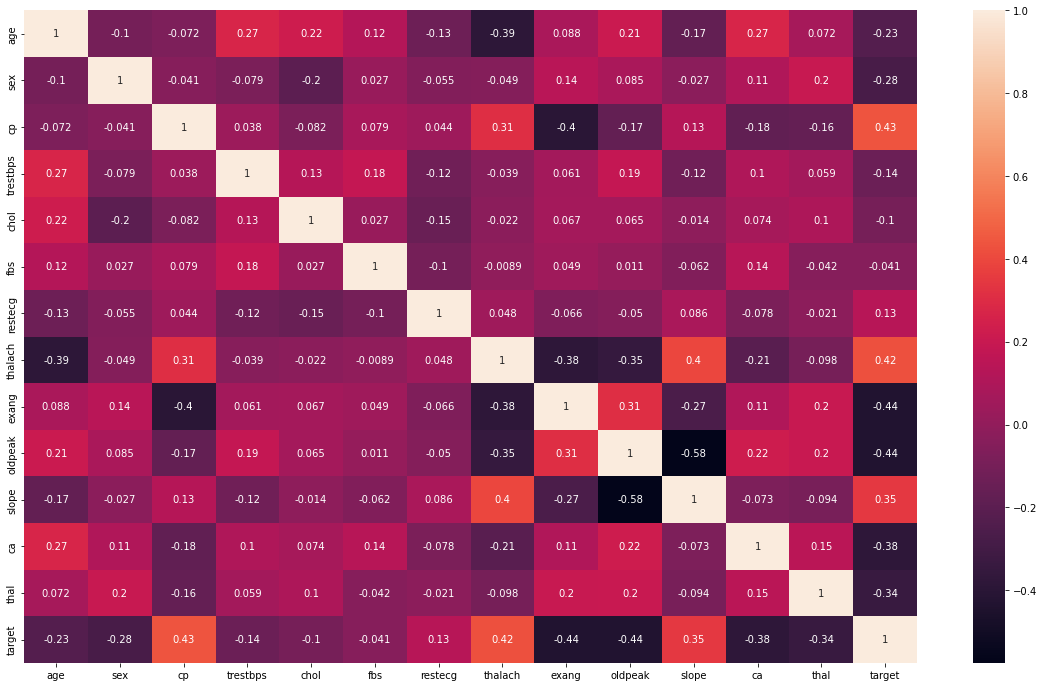

In [8]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

### Analysing "age" feature

In [9]:
df["age"].value_counts()[:10]

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
Name: age, dtype: int64

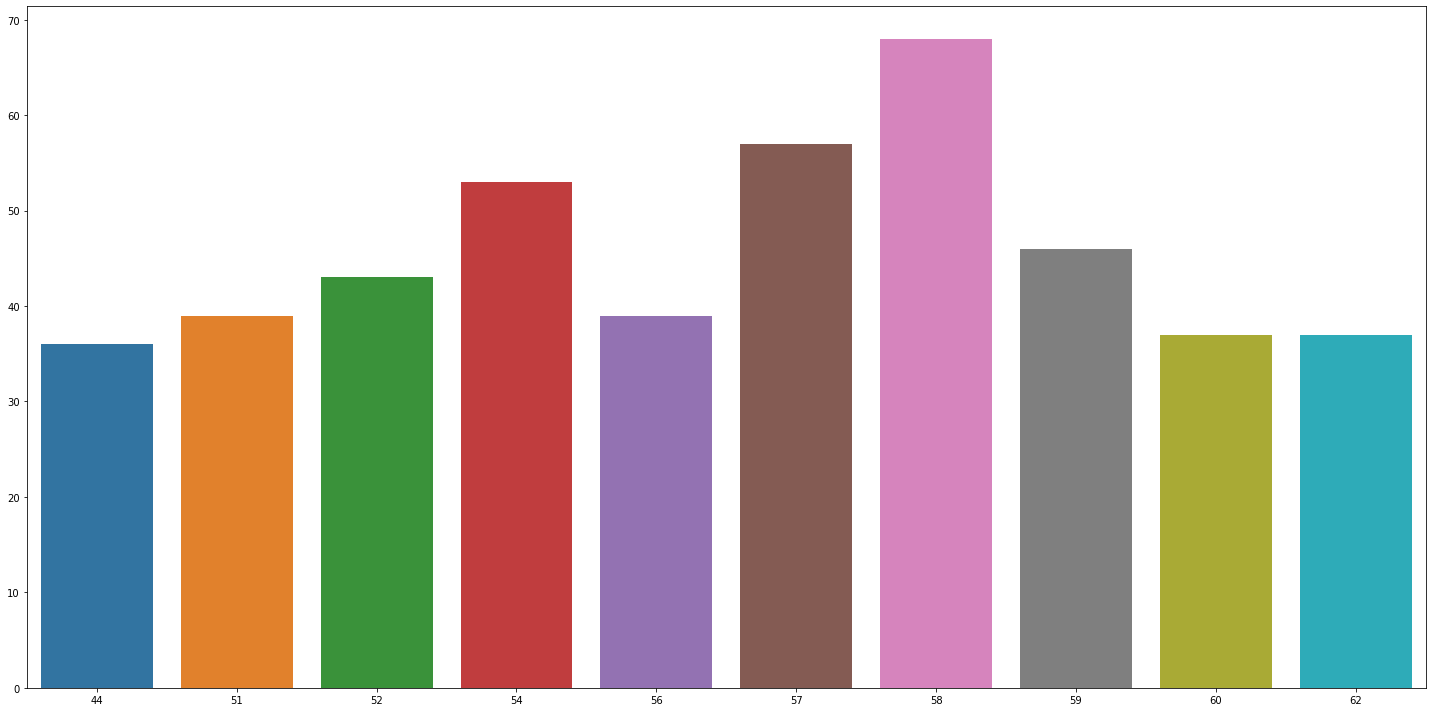

In [10]:
plt.figure(figsize=(20,10))
sns.barplot(x=df["age"].value_counts()[:10].index,y=df["age"].value_counts()[:10].values)
plt.tight_layout()

Observation : People with age=58 has the highest frequency

### Analysing "target" feature

In [11]:
#This is a balanced data as the target variable is evenly distributed
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

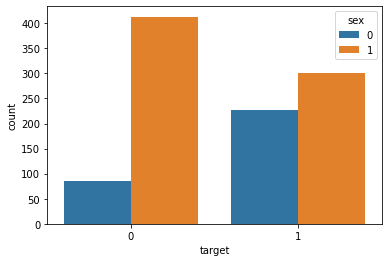

In [12]:
sns.countplot("target",data=df,hue="sex")

### Analysing "sex" feature

1    713
0    312
Name: sex, dtype: int64


C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

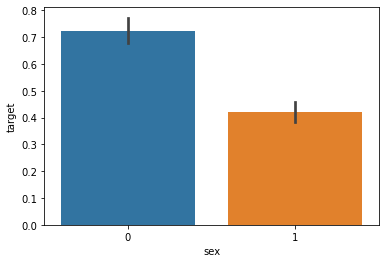

In [13]:
print(df["sex"].value_counts())
sns.barplot(df["sex"],df["target"])

Observation : from here we observe that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type(CP)' feature

In [14]:
df["cp"].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='target'>

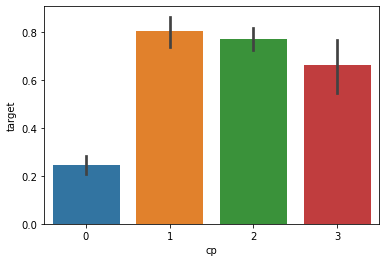

In [15]:
sns.barplot("cp","target",data=df)

Observation : from here we observe that Chest Pain type(0) are much less likely to have heart problems

### Analysing the "fbs" feature

In [16]:
df["fbs"].value_counts()

0    872
1    153
Name: fbs, dtype: int64

C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='target'>

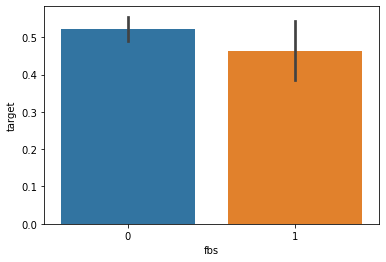

In [17]:
sns.barplot(df["fbs"],df["target"])

### Analysing the restecg feature

In [18]:
df["restecg"].value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='target'>

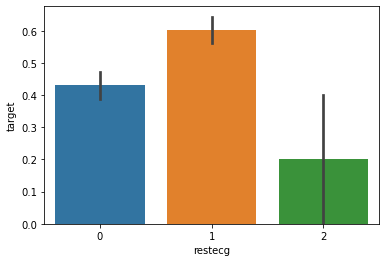

In [19]:
sns.barplot(df["restecg"],df["target"])

Observation : People with restecg '1' are more likely to have a heart disease than other two

### Analysing the 'exang'(exercise induced angina) feature

In [20]:
df["exang"].value_counts()

0    680
1    345
Name: exang, dtype: int64

C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='target'>

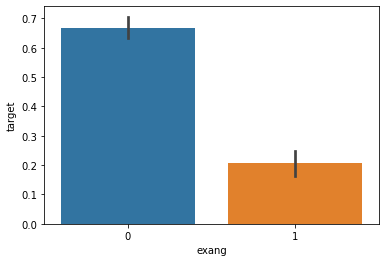

In [21]:
sns.barplot(df["exang"],df["target"])

Observation : People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the "slope" feature

In [22]:
df["slope"].value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='target'>

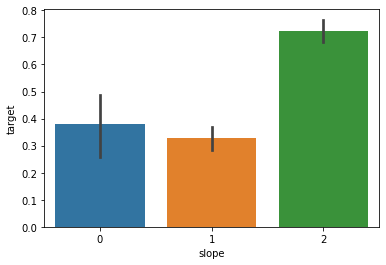

In [23]:
sns.barplot(df["slope"],df["target"])

Observation : Slope '2' causes more heart pain than Slope '0' and '1'

### Analysing the 'ca' feature

In [24]:
df["ca"].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='target'>

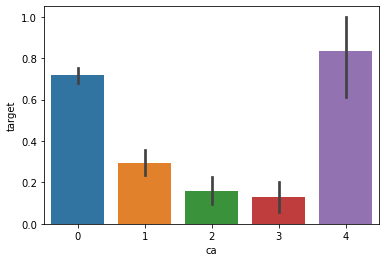

In [25]:
sns.barplot(df["ca"],df["target"])

Observation : ca=4 are more likely to be heart patients

### Analysing the 'thal' feature

In [26]:
df["thal"].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='target'>

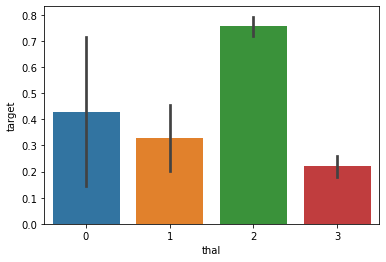

In [27]:
sns.barplot(df["thal"],df["target"])

In [28]:
# Splitting the dependent and independent variable

x=df.drop("target",axis=1)
y=df["target"]

In [29]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


### Train_test_split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Splitting the data into train_data and test_data
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y,random_state=42)

In [32]:
print(x.shape,x_train.shape,x_test.shape,y.shape,y_train.shape,y_test.shape)

(1025, 13) (820, 13) (205, 13) (1025,) (820,) (205,)


In [33]:
x_test.to_csv("x_test.csv")

# Model Building

### 1.Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model_1=LogisticRegression()

In [36]:
model_1.fit(x_train,y_train)

C:\Users\GAURAV KUMAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
predictions=model_1.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
model_1_accuracy=accuracy_score(predictions,y_test)

In [40]:
model_1_accuracy

0.8341463414634146

In [41]:
print(confusion_matrix(predictions,y_test))
print(classification_report(predictions,y_test))

[[74  8]
 [26 97]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        82
           1       0.92      0.79      0.85       123

    accuracy                           0.83       205
   macro avg       0.83      0.85      0.83       205
weighted avg       0.85      0.83      0.84       205



In [42]:
input_data=np.array([[40,1,0,152,223,0,1,181,0,0,2,0,3]])
model_1.predict(input_data)

array([1], dtype=int64)

### 2.Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
model_rf.fit(x_train, y_train)
rf_predicted = model_rf.predict(x_test)
print(accuracy_score(rf_predicted,y_test))
print("\n")
print(confusion_matrix(rf_predicted,y_test))
print("\n")
print(classification_report(rf_predicted,y_test))


0.9170731707317074


[[89  6]
 [11 99]]


              precision    recall  f1-score   support

           0       0.89      0.94      0.91        95
           1       0.94      0.90      0.92       110

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



In [44]:
input_data=np.array([[40,1,0,152,223,0,1,181,0,0,2,0,3]])
model_rf.predict(input_data)

array([0], dtype=int64)

### 3.Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
model_dt.fit(x_train, y_train)
dt_predicted = model_dt.predict(x_test)
print(accuracy_score(dt_predicted,y_test))
print("\n")
print(confusion_matrix(dt_predicted,y_test))
print("\n")
print(classification_report(dt_predicted,y_test))


0.926829268292683


[[92  7]
 [ 8 98]]


              precision    recall  f1-score   support

           0       0.92      0.93      0.92        99
           1       0.93      0.92      0.93       106

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



In [46]:
input_data=np.array([[40,1,0,152,223,0,1,181,0,0,2,0,3]])
model_dt.predict(input_data)

array([0], dtype=int64)

### 4.SVM

In [47]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(x_train, y_train)
svm_predicted = model_svm.predict(x_test)
print(accuracy_score(svm_predicted,y_test))
print("\n")
print(confusion_matrix(svm_predicted,y_test))
print("\n")
print(classification_report(svm_predicted,y_test))

0.7170731707317073


[[64 22]
 [36 83]]


              precision    recall  f1-score   support

           0       0.64      0.74      0.69        86
           1       0.79      0.70      0.74       119

    accuracy                           0.72       205
   macro avg       0.72      0.72      0.71       205
weighted avg       0.73      0.72      0.72       205



In [48]:
input_data=np.array([[40,1,0,152,223,0,1,181,0,0,2,0,3]])
model_svm.predict(input_data)

array([1], dtype=int64)

#### Observation : Out of all the model Decision Tree model gives the best accuracy